In [14]:
import numpy as np
import pandas as pd

In [15]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()[:10]
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_budget_list=["./budget"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_budget_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Lamarck_budget.csv",header=True,index=True)

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558], dtype='int64')
                   590        593        579        588        589        591  \
F1  Times1   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
    Times2   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
    Times3   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
    Times4   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
    Times5   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
...                ...        ...        ...        ...        ...        ...   
F23 Times6   2000198.0   118436.0   103192.0   103806.0  2000198.0   117790.0   
    Times7     97350.0    64666.0   140272.0    66040.0   168342.0    91738.0   
    Times8    125634.0    53844.0  2000398.0   134954.0   102210.0    32730.0   
    Times9     95450.0    45034.0    61790.0    48258.0    84

In [16]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()[:10]
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Lamarck_rawdata.csv",header=True,index=True)

def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if ((x-optimal)<=threshold or x<=optimal) else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

threshold =0.0001
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = np.arange(1, 24, 1)
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 10) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
percent_df.to_csv("./Lamarck_percent.csv")

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558], dtype='int64')
                   590        593        579        588        589        591  \
F1  Times1    0.002860   0.002471   0.001030   0.002377   0.002108   0.001700   
    Times2    0.001824   0.001727   0.001236   0.003462   0.003075   0.002476   
    Times3    0.002365   0.002970   0.001647   0.002308   0.002058   0.002677   
    Times4    0.002543   0.001552   0.001222   0.001627   0.003379   0.001500   
    Times5    0.001582   0.003094   0.001051   0.002270   0.002220   0.001603   
...                ...        ...        ...        ...        ...        ...   
F23 Times6   -5.128481 -10.536275 -10.536204 -10.536211  -5.175647 -10.536320   
    Times7  -10.536327 -10.536247 -10.536257 -10.536290 -10.536232 -10.536286   
    Times8  -10.536338 -10.536284  -5.175647 -10.536248 -10.536310 -10.536342   
    Times9  -10.536332 -10.536272 -10.536271 -10.536216 -10.5

,590,593,579,588,589,591,576,587,569,558
Function,,,,,,,,,,
F1,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F2,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F3,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F4,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F5,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F6,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F7,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F8,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F9,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


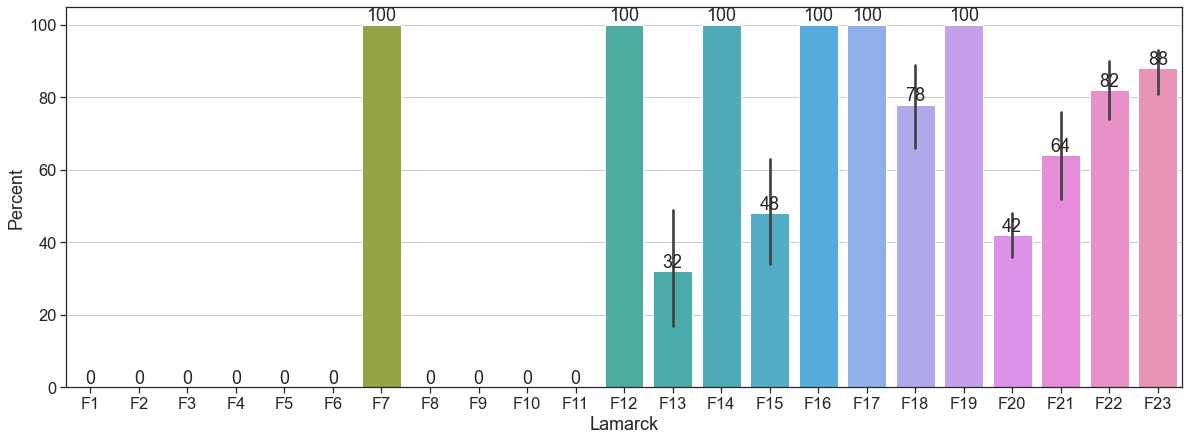

In [17]:
from matplotlib import pyplot as plt
dataframe = percent_df.copy()
dataframe = dataframe.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
# display(dataframe)
import seaborn as sns
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize=(20,7))
    plt.subplot(1,1,1)
    ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xlabel("Lamarck")
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
    plt.savefig("./Lamarck_percent.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

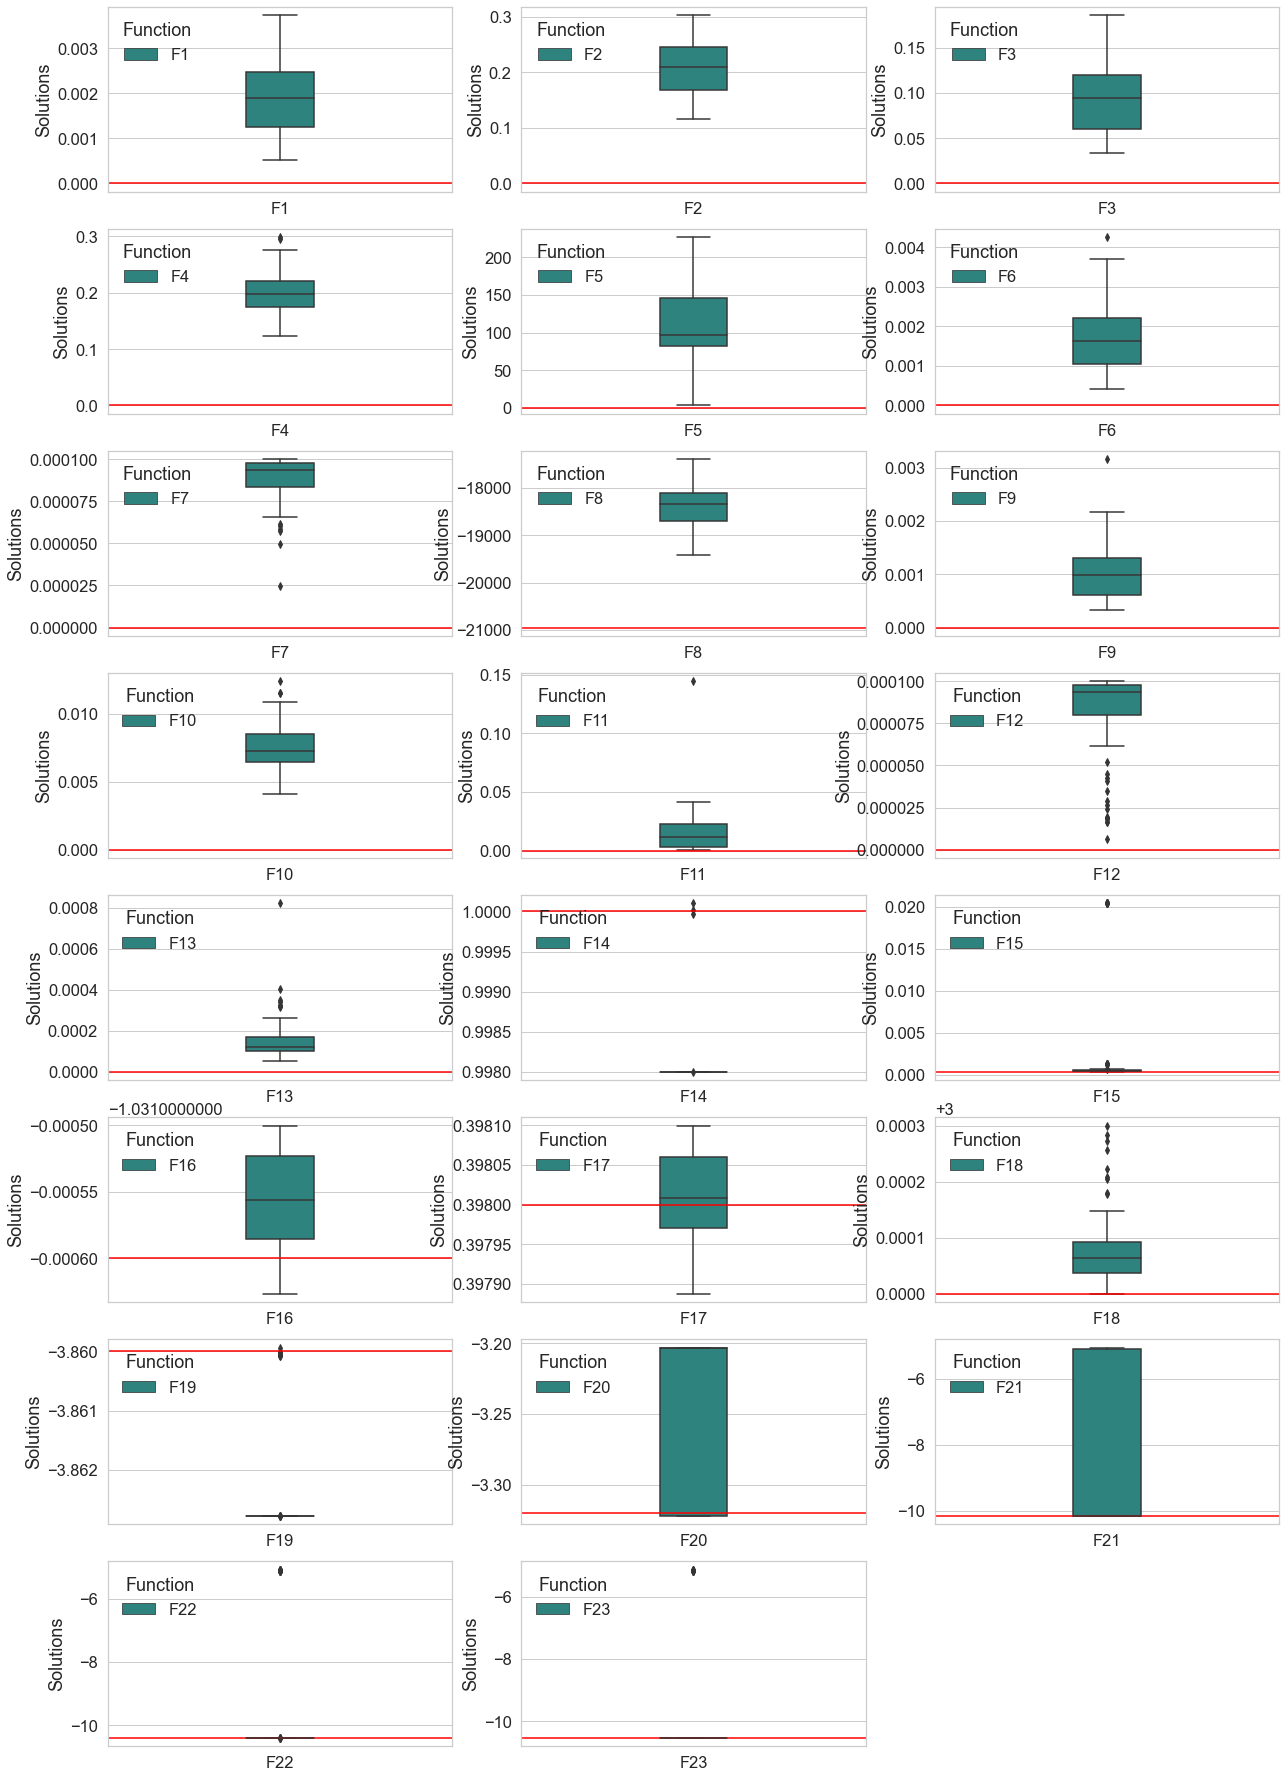

In [18]:
from matplotlib import pyplot as plt
dataframe = df.copy()
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Solutions")
dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    dist_cols = 3
    dist_rows = 8
    plt.figure(figsize=(7 * dist_cols, 4 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        ax=sns.boxplot(data=dataf, y="Solutions",palette="viridis",x="Function",hue="Function",width=0.2)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1),frameon=False)
        plt.axhline(y=opt[i-1],color="red")
        plt.xlabel("")
        plt.ylabel("Solutions")
        i = i + 1
    plt.savefig("./boxplot_Lamarck.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)